<a href="https://colab.research.google.com/github/juwimana/Trading/blob/main/Stock_Purchase_Valuation_2_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import packages
import datetime as dt
import pandas as pd

#visualization packages
import seaborn as sns
import matplotlib.pyplot as plt

#install mplfinance package
!pip install mplfinance
import mplfinance as mpf

#install python package yfinance
!pip install yfinance
import yfinance as yf

# import stock_info module from yahoo_fin
!pip install yahoo_fin
from yahoo_fin import stock_info as si

#styling package
from IPython.display import HTML

#currency formatting
import locale 
locale.setlocale(locale.LC_ALL, '')

In [24]:
#Creating Stock class
class Stock:
  #The __init__() function is called automatically every time the class is being used to create a new object
  def __init__(self, ticker, shares, p_price):
    self.ticker = ticker
    self.shares = shares
    self.p_price = p_price

    #define global variables
    global str_summary
    global str_stat 
    global str_analysis
    global str_financials
    global url_summary
    global url_stat 
    global url_analysis
    global url_financials
    global url_indexes

    #incomplete url string
    str_summary= 'https://finance.yahoo.com/quote/{}?p={}&.tsrc=fin-srch'
    str_stat = 'https://finance.yahoo.com/quote/{}/key-statistics?p={}'
    str_analysis = 'https://finance.yahoo.com/quote/{}/analysis?p={}'
    str_financials= 'https://finance.yahoo.com/quote/{}/financials?p={}'

    #complete website url
    url_summary = str_summary.format(self.ticker,self.ticker)
    url_stat = str_stat.format(self.ticker,self.ticker)
    url_analysis = str_analysis.format(self.ticker,self.ticker)
    url_financials = str_financials.format(self.ticker,self.ticker)
    url_indexes = 'https://finance.yahoo.com/world-indices'

  def name(self):
    stock = yf.Ticker(self.ticker)
    return stock.info.get('longName')

  def trade_exchange(self):
    stock = yf.Ticker(self.ticker)
    return stock.info.get('exchange')
  
  def market_cap(self):
    stock = yf.Ticker(self.ticker)
    print("Find more info on Market Capitalization at https://www.investopedia.com/terms/m/marketcapitalization.asp \n")
    return "${:,}".format(stock.info.get('marketCap')) 

  def sector(self):
    stock = yf.Ticker(self.ticker)
    return stock.info.get('sector')

  def industry(self):
    stock = yf.Ticker(self.ticker)
    return stock.info.get('industry')
  
  def beta(self):
    stock = yf.Ticker(self.ticker)
    print("Find more info on BETA at https://www.investopedia.com/terms/b/beta.asp \n")
    return stock.info.get('beta') 

  def peg(self):
    stock = yf.Ticker(self.ticker)
    print("Find more info on PEG Ratio at https://www.investopedia.com/terms/p/pegratio.asp \n")
    return stock.info.get('pegRatio')
      
  
  def eps(self):
    #read ticker financial summary page
    df_summary = pd.read_html(url_summary, header = 0)
    print("Find more info on EPS at https://www.investopedia.com/terms/e/eps.asp \n")
    return df_summary[1].loc[2][1]

  def low_52(self):
    #read ticker statistics page
    df_stat = pd.read_html(url_stat, header = 0)
    return df_stat[1].loc[3][1]

  def high_52(self):
    #read ticker statistics page
    df_stat = pd.read_html(url_stat, header = 0)
    return df_stat[1].loc[2][1]

  def book_value(self):
    stock = yf.Ticker(self.ticker)
    print("Find more info on Book Value at https://www.investopedia.com/terms/b/bookvalue.asp \n")
    return stock.info.get('bookValue')

  def ev(self):
    stock = yf.Ticker(self.ticker)
    print("Find more info on EV at https://www.investopedia.com/terms/e/enterprisevalue.asp \n")
    return "${:,}".format(stock.info.get('enterpriseValue'))

  def ev_ebitda(self):
    stock = yf.Ticker(self.ticker)
    print("Find more info on EV/EBITDA at https://www.investopedia.com/ask/answers/072715/what-considered-healthy-evebitda.asp \n")
    return stock.info.get('enterpriseToEbitda')

  def ev_revenue(self):
    stock = yf.Ticker(self.ticker)
    print("Find more info on EV/Revenue at https://www.investopedia.com/terms/e/ev-revenue-multiple.asp \n")
    return stock.info.get('enterpriseToRevenue')

  def op_margin(self):
    #read ticker statistics page
    df_stat = pd.read_html(url_stat, header = 0)
    print("Find more info on Operating Margin at https://www.investopedia.com/terms/o/operatingmargin.asp#:~:text=The%20operating%20margin%20measures%20how%20much%20profit%20a,a%20company%E2%80%99s%20operating%20profit%20by%20its%20net%20sales. \n")
    return df_stat[5].loc[0][1]
  
  def roe(self):
    #read ticker statistics page
    df_stat = pd.read_html(url_stat, header = 0)
    print("Find more info on ROE at https://www.investopedia.com/terms/r/returnonequity.asp \n")
    return df_stat[6].loc[0][1]

  def debt_equity(self):
    #read ticker statistics page
    df_stat = pd.read_html(url_stat, header = 0)
    print("Find more info on Debt-To-Equity Ratio at https://www.investopedia.com/terms/d/debtequityratio.asp \n")
    return df_stat[8].loc[2][1]

  def ge_nextyear(self):
    #read ticker analysis page
    df_analysis = pd.read_html(url_analysis, header = 0)
    return df_analysis[5].loc[3][1]

  def ge_next5(self):
    #read ticker analysis page
    df_analysis = pd.read_html(url_analysis, header = 0)
    return df_analysis[5].loc[4][1]

  def ge_beyond5(self):
    #read ticker analysis page
    df_analysis = pd.read_html(url_analysis, header = 0)
    return df_analysis[5].loc[5][1]

  def gain_dlr(self):
    #return dollar gain from share purchase
    return "${:,}".format((round(si.get_live_price(self.ticker),2) - self.p_price)*self.shares)

  def gain_pct(self):
    #return dollar gain from share purchase
    d_gain = Stock.gain_dlr(self)
    return "{:.2%}".format(d_gain/(self.p_price*self.shares))

  def get_historicalData(self):
    #get stock price historical data
    stock = yf.Ticker(self.ticker)
    h_stock = stock.history(period='max')
    return h_stock

  def plot_historicalData(self, shares_traded):
    h_stock = Stock.get_historicalData(self)

    if (shares_traded == False):
      #plot historical data
      plt.rcParams["figure.figsize"] = (20,7)
      sns.set_theme(style="whitegrid")
      sns.lineplot(data=h_stock.High, palette='tab10')
    else: 
      #plot stock historical data using mplfinance package
      mpf.plot(h_stock,type='candle',mav=(3,6,9),volume=True, figratio=(25,10), 
         title='\n{}\n {}, {} {}, {}'.format(Stock.name(self),dt.date.today().strftime('%A'), dt.date.today().strftime("%B"), dt.date.today().day, dt.date.today().year),
         ylabel='OHLC Candles',
         ylabel_lower='Shares\nTraded'
         )
    
  def us_indexes(self):
    #real-time US major index trend
    df_indexes = pd.read_html(url_indexes, header = 0)
    index_name = df_indexes[0].get('Name').to_frame()
    d_change  = df_indexes[0].get('Change').to_frame()
    p_change = df_indexes[0].get('% Change').to_frame()
    last_price = df_indexes[0].get('Last Price').to_frame()
    index_df = pd.concat([index_name, last_price ,d_change, p_change], axis=1, sort=False)
    return index_df[0:3]



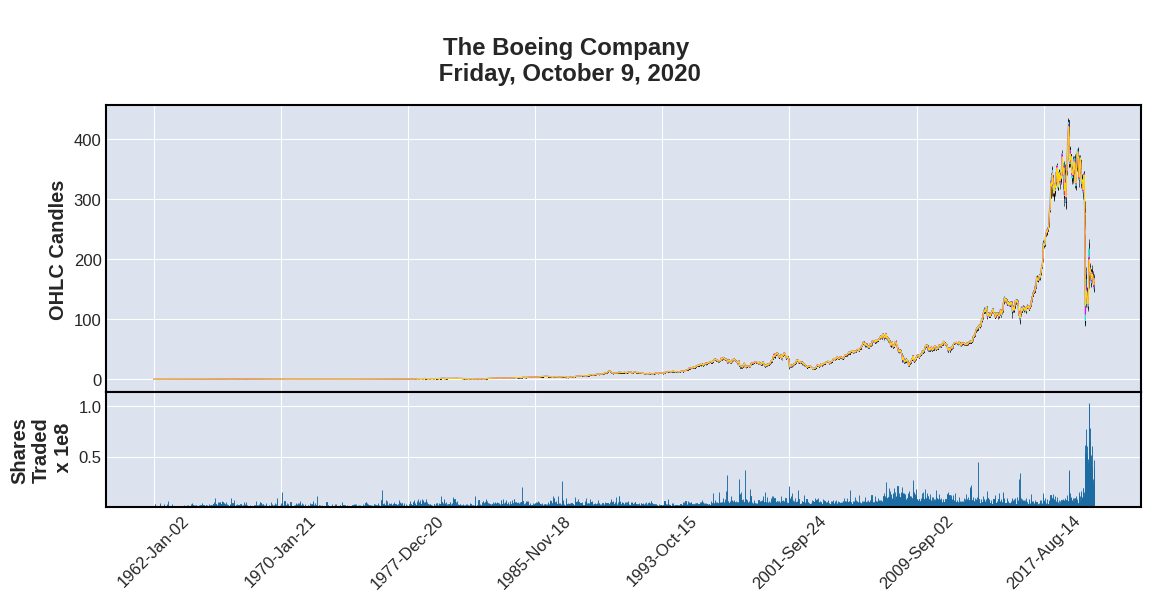

In [28]:
p = Stock('ba',0,0)
p.plot_historicalData(True)